<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>
<font size=4>
<br/>
</div>

# Personal Data

In [3]:
# Set your student number
student_number = 98101736
Name = 'Ali'
Last_Name = 'Aramideh'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch.

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [6]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [8]:
## FILL HERE
from torchvision.datasets import CIFAR10
train_set = CIFAR10(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = CIFAR10(root='.', train=False, download=True, transform=transforms.ToTensor())

image_shape = train_set[0][0].shape
input_dim = np.prod(image_shape).item()
num_classes = len(train_set.classes)

train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

100%|██████████| 170498071/170498071 [00:02<00:00, 74942130.46it/s]


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


## Visualization

Visualize 1 random image from each class


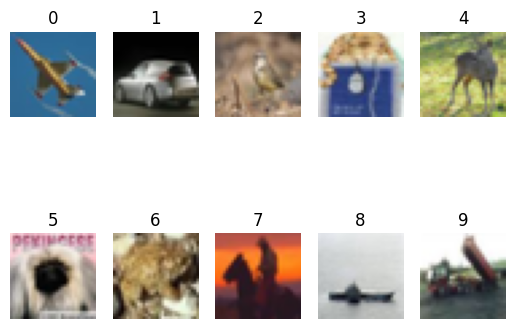

In [9]:
## FILL HERE
trainBatch = iter(train_loader)
trainIMG, label = trainBatch.__next__()
allClasses = set(label.tolist())
listedLabel = label.tolist()

for i in range(num_classes):
    plt.subplot(num_classes//5, num_classes//2, i+1)

    indices = [j for j, val in enumerate(listedLabel) if val == i]
    randomIndex = np.random.randint(len(indices))
    IMG = trainIMG[indices[randomIndex]].numpy()
    IMG = np.transpose(IMG, (1, 2, 0))
    plt.imshow(IMG)
    plt.axis('off')
    plt.title(i)

## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ## FILL HERE
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.conv4 = nn.Conv2d(128, 128, 3)
        self.conv5 = nn.Conv2d(128, 128, 3)
        self.conv6 = nn.Conv2d(128, 256, 3)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(128*3*3, 256)
        self.fc2 = nn.Linear(256, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        ## FILL HERE
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        #x = self.pool(x)
        x = F.relu(self.conv3(x))


        """x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))"""

        #x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))

        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

net = Net().to(device)

## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [11]:
## FILL HERE
learning_rate =0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [14]:
epoch_nums = 50## Number of epochs
n_total_steps = len(train_loader)
for epoch in range(epoch_nums):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        ## FILL HERE
        ## You should train the model and also print the running loss for each batch
        x, y = data
        x =  x.to(device)
        y = y.to(device)

        output = net(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch: {epoch+1} from Epoch {epoch_nums} loss: {running_loss/n_total_steps}")

print('Finished Training')

Epoch: 1 from Epoch 50 loss: 0.5418229285065476
Epoch: 2 from Epoch 50 loss: 0.5197261259378985
Epoch: 3 from Epoch 50 loss: 0.49056881410843883
Epoch: 4 from Epoch 50 loss: 0.47146814366054657
Epoch: 5 from Epoch 50 loss: 0.4489086239081819
Epoch: 6 from Epoch 50 loss: 0.4324792390093779
Epoch: 7 from Epoch 50 loss: 0.4059911320924454
Epoch: 8 from Epoch 50 loss: 0.3958803283627076
Epoch: 9 from Epoch 50 loss: 0.37271348825272393
Epoch: 10 from Epoch 50 loss: 0.3514746154856194
Epoch: 11 from Epoch 50 loss: 0.3291903366632474
Epoch: 12 from Epoch 50 loss: 0.31661754763682787
Epoch: 13 from Epoch 50 loss: 0.2974714279803626
Epoch: 14 from Epoch 50 loss: 0.2767960556099177
Epoch: 15 from Epoch 50 loss: 0.264572179921524
Epoch: 16 from Epoch 50 loss: 0.25535967713579194
Epoch: 17 from Epoch 50 loss: 0.226777778576364
Epoch: 18 from Epoch 50 loss: 0.2199880318416049
Epoch: 19 from Epoch 50 loss: 0.20416727093765347
Epoch: 20 from Epoch 50 loss: 0.18988950481957487
Epoch: 21 from Epoch 50 

## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [15]:
correct = 0
total = 10000
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        ## FILL HERE
        x, y = data
        output = net(x)

        _, predicted = torch.max(output, 1)
        correct += (predicted == y).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 74.44 %


Here, we also calculate the model performance for each class as well.

In [16]:
# prepare to count predictions for each class
classes = train_set.classes
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        ## FILL HERE
        x, y = data
        output = net(x)
        _, predicted = torch.max(output, 1)

        yy = y.numpy()
        predd = predicted.numpy()

        for i in range(10):
            currentClass = classes[i]

            predIndex = np.where(predd == i)[0].tolist()
            temp1 = yy[predIndex]
            count = np.count_nonzero(temp1 == i)
            correct_pred[currentClass] += count
            total_pred[currentClass] += np.count_nonzero(predd == i)







# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 75.7 %
Accuracy for class: automobile is 86.5 %
Accuracy for class: bird  is 66.5 %
Accuracy for class: cat   is 54.4 %
Accuracy for class: deer  is 71.5 %
Accuracy for class: dog   is 65.6 %
Accuracy for class: frog  is 81.5 %
Accuracy for class: horse is 78.9 %
Accuracy for class: ship  is 84.2 %
Accuracy for class: truck is 81.5 %
